## Mall Customer Market Segmentation

Data source: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
data = pd.read_csv('archive/Mall_Customers.csv')
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


### Preprocessing

In [4]:
data.drop('CustomerID', axis=1, inplace=True)

In [5]:
data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [6]:
encoder = LabelEncoder()

data['Gender'] = encoder.fit_transform(data['Gender'])
gender_mappings = {index: label for index, label in enumerate(encoder.classes_)}
gender_mappings

{0: 'Female', 1: 'Male'}

In [7]:
scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

In [8]:
scaled_data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.128152,-1.424569,-1.738999,-0.434801
1,1.128152,-1.281035,-1.738999,1.195704
2,-0.886405,-1.352802,-1.700830,-1.715913
3,-0.886405,-1.137502,-1.700830,1.040418
4,-0.886405,-0.563369,-1.662660,-0.395980
...,...,...,...,...
195,-0.886405,-0.276302,2.268791,1.118061
196,-0.886405,0.441365,2.497807,-0.861839
197,1.128152,-0.491602,2.497807,0.923953
198,1.128152,-0.491602,2.917671,-1.250054


### Clustering

In [10]:
max_clusters = 50

kmeans_tests = [KMeans(n_clusters=i, n_init=10) for i in range(1, max_clusters)]

inertias = [kmeans_tests[i].fit(scaled_data).inertia_ for i in range(len(kmeans_tests))]

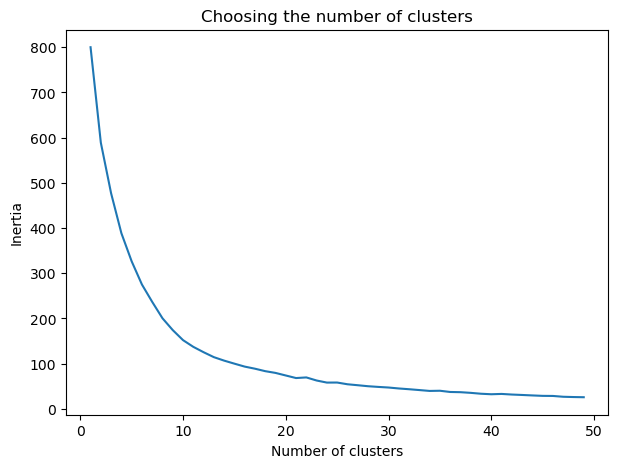

In [11]:
plt.figure(figsize=(7, 5))
plt.plot(range(1, max_clusters), inertias)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Choosing the number of clusters')
plt.show()

In [12]:
kmeans = KMeans(n_clusters=10, n_init=10)
kmeans.fit(scaled_data)

,n_clusters,10
,init,'k-means++'
,n_init,10
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [13]:
clusters = kmeans.predict(scaled_data)
clusters

array([7, 7, 0, 9, 0, 9, 0, 9, 8, 9, 8, 9, 0, 9, 0, 7, 0, 7, 8, 9, 7, 7,
       0, 7, 0, 7, 0, 7, 0, 9, 8, 9, 8, 7, 0, 9, 0, 9, 0, 9, 3, 7, 8, 5,
       0, 9, 3, 5, 5, 5, 3, 7, 5, 8, 3, 8, 3, 8, 5, 8, 8, 7, 3, 3, 8, 7,
       3, 3, 7, 5, 8, 3, 3, 3, 8, 7, 3, 7, 5, 3, 8, 7, 8, 3, 5, 8, 3, 5,
       5, 3, 3, 7, 8, 5, 5, 7, 3, 5, 8, 7, 5, 3, 8, 7, 8, 5, 3, 8, 8, 8,
       8, 5, 5, 7, 5, 5, 3, 3, 3, 3, 7, 5, 5, 1, 5, 4, 2, 1, 8, 1, 2, 1,
       5, 4, 2, 4, 6, 1, 2, 4, 6, 1, 5, 4, 2, 1, 2, 4, 6, 1, 2, 1, 6, 4,
       6, 4, 2, 4, 2, 4, 3, 4, 2, 4, 2, 4, 2, 4, 6, 1, 2, 1, 2, 1, 6, 4,
       2, 1, 2, 1, 6, 4, 2, 4, 6, 1, 6, 1, 6, 4, 6, 4, 2, 4, 6, 4, 6, 1,
       2, 1], dtype=int32)

### PCA

In [14]:
pca = PCA(n_components=2)

reduced_data = pd.DataFrame(pca.fit_transform(scaled_data), columns=['PC1', 'PC2'])

In [15]:
reduced_data

,PC1,PC2
0,-0.406383,-0.520714
1,-1.427673,-0.367310
2,0.050761,-1.894068
3,-1.694513,-1.631908
4,-0.313108,-1.810483
...,...,...
195,-1.179572,1.324568
196,0.672751,1.221061
197,-0.723719,2.765010
198,0.767096,2.861930


In [16]:
kmeans.cluster_centers_

array([[-0.7425083 ,  0.16967696, -1.31640908, -1.1668652 ],
       [ 1.12815215, -0.39989994,  1.01344075,  1.26040667],
       [ 1.12815215, -0.02700694,  0.96701244, -1.39716754],
       [-0.88640526,  1.09830638, -0.24158313, -0.04807901],
       [-0.88640526, -0.47793198,  0.97284787,  1.22158511],
       [-0.88640526, -0.78153925, -0.12214217, -0.11957041],
       [-0.88640526,  0.35421988,  1.24912183, -1.14745442],
       [ 1.12815215, -0.97602698, -0.73705168,  0.41603773],
       [ 1.12815215,  1.43505777, -0.45298304, -0.40195247],
       [-0.88640526, -0.96084556, -1.33087991,  1.17778643]])

In [17]:
reduced_centers = pca.transform(kmeans.cluster_centers_)

/home/aditya/miniconda3/envs/tfenv/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


In [18]:
reduced_centers

array([[ 0.75229959, -1.61087948],
       [-0.88272588,  1.65431318],
       [ 1.19961046,  1.30582744],
       [ 0.58233488, -0.85939176],
       [-1.38150389,  0.3644368 ],
       [-0.662429  , -0.58044771],
       [ 0.81659377,  0.24505923],
       [-0.68838314,  0.28733559],
       [ 1.5303687 ,  0.17028966],
       [-1.6696024 , -1.35294268]])

In [20]:
reduced_data['cluster'] = clusters
reduced_data

,PC1,PC2,cluster
0,-0.406383,-0.520714,7
1,-1.427673,-0.367310,7
2,0.050761,-1.894068,0
3,-1.694513,-1.631908,9
4,-0.313108,-1.810483,0
...,...,...,...
195,-1.179572,1.324568,4
196,0.672751,1.221061,6
197,-0.723719,2.765010,1
198,0.767096,2.861930,2


In [26]:
reduced_data[reduced_data['cluster'] == 7].loc[:, 'PC1']

0     -0.406383
1     -1.427673
15    -1.326131
17    -1.078425
20     0.488090
21    -1.018951
23    -0.722973
25    -1.062412
27    -0.206188
33    -1.873297
41    -1.578248
51    -0.281508
61    -0.840256
65    -0.996758
68    -0.947390
75    -0.469868
77     0.381292
81     0.095885
91    -0.519300
95    -0.516663
99    -0.634366
103   -0.498393
113   -0.604429
120   -0.476852
Name: PC1, dtype: float64

### Data Visualization

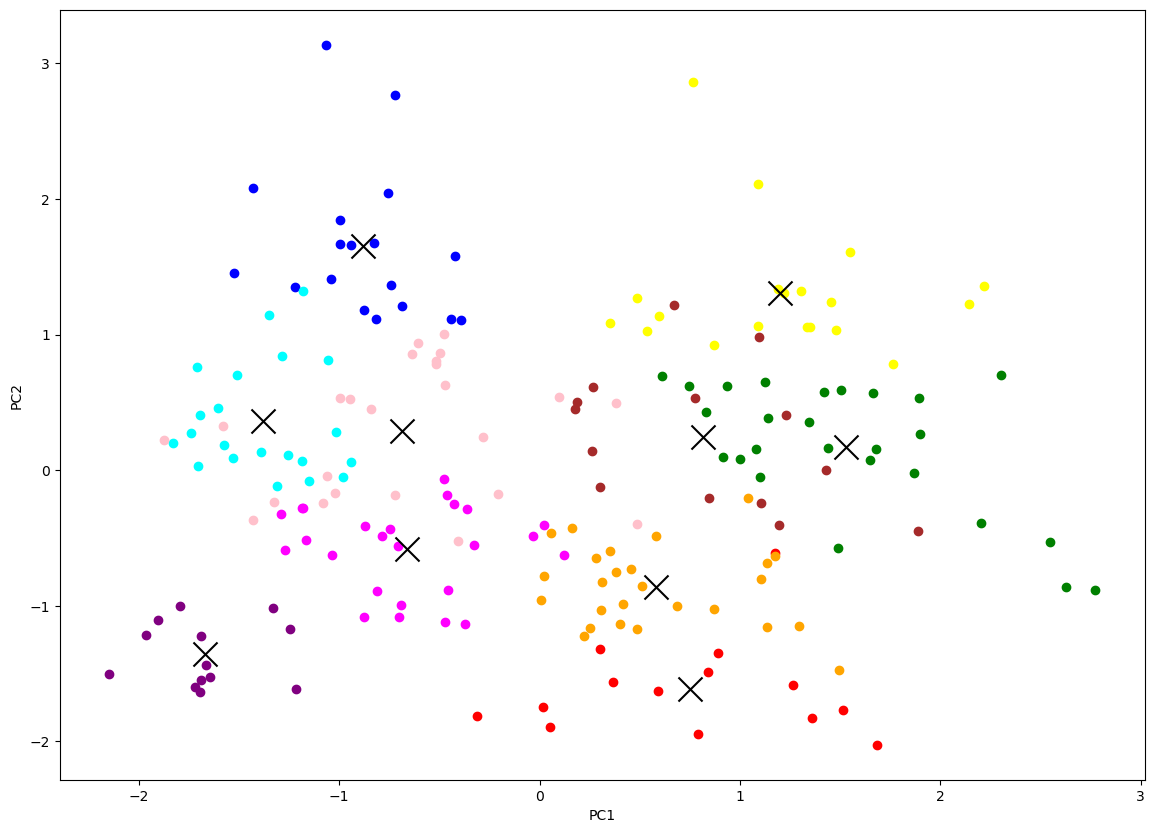

In [35]:
plt.figure(figsize=(14, 10))

plt.scatter(reduced_data[reduced_data['cluster'] == 0].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] == 0].loc[:, 'PC2'], color='red')
plt.scatter(reduced_data[reduced_data['cluster'] == 1].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] == 1].loc[:, 'PC2'], color='blue')
plt.scatter(reduced_data[reduced_data['cluster'] == 2].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] == 2].loc[:, 'PC2'], color='yellow')
plt.scatter(reduced_data[reduced_data['cluster'] == 3].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] == 3].loc[:, 'PC2'], color='orange')
plt.scatter(reduced_data[reduced_data['cluster'] == 4].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] == 4].loc[:, 'PC2'], color='cyan')
plt.scatter(reduced_data[reduced_data['cluster'] == 5].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] == 5].loc[:, 'PC2'], color='magenta')
plt.scatter(reduced_data[reduced_data['cluster'] == 6].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] == 6].loc[:, 'PC2'], color='brown')
plt.scatter(reduced_data[reduced_data['cluster'] == 7].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] == 7].loc[:, 'PC2'], color='pink')
plt.scatter(reduced_data[reduced_data['cluster'] == 8].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] == 8].loc[:, 'PC2'], color='green')
plt.scatter(reduced_data[reduced_data['cluster'] == 9].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] == 9].loc[:, 'PC2'], color='purple')

plt.scatter(reduced_centers[:, 0], reduced_centers[:, 1], color='black', marker='x', s=300)

plt.xlabel('PC1')
plt.ylabel('PC2')

plt.show()